# Cluster Spotify Data using K-Prototypes (Mix between K-means and K-modes)
The data has 19 features. 3 categorical features and 10 continuous features will be used for modeling while the other features that have IDs and track location data will need to be scrubbed. 

The data is easy to use and without misssing values

In [1]:
import pandas as pd
rawData = pd.read_csv('spotifyLibraryNames.csv')
list(rawData.columns)

['n',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'songName']

In [2]:
rawData.describe()

,n,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1.579000e+03,1579.000000
mean,789.000000,0.693868,0.636057,5.149462,-6.846179,0.550348,0.159726,0.173077,0.046422,0.190662,0.441259,124.746564,2.191493e+05,3.974668
std,455.962352,0.146006,0.159708,3.632930,2.434813,0.497616,0.131548,0.197039,0.158075,0.141716,0.223440,27.375703,5.726522e+04,0.262805
min,0.000000,0.157000,0.109000,0.000000,-21.447000,0.000000,0.024400,0.000025,0.000000,0.016000,0.026600,55.679000,5.564000e+04,1.000000
25%,394.500000,0.598000,0.530500,1.000000,-8.150500,0.000000,0.051700,0.024650,0.000000,0.101000,0.265000,103.723500,1.860735e+05,4.000000
50%,789.000000,0.708000,0.637000,5.000000,-6.568000,1.000000,0.108000,0.093300,0.000004,0.134000,0.420000,125.993000,2.134000e+05,4.000000
75%,1183.500000,0.805000,0.750000,8.000000,-5.200000,1.000000,0.251000,0.259000,0.001485,0.238000,0.601000,142.336000,2.461730e+05,4.000000
max,1578.000000,0.980000,0.994000,11.000000,-0.283000,1.000000,0.855000,0.944000,0.973000,0.966000,0.980000,215.593000,1.146163e+06,5.000000


# Data Cleaning

In [3]:
#remove unnecessary data like id and song name (not needed in modeling)
rawDataVals = [x for x in rawData.columns if x not in ['n','type', 'id',
                                                              'uri', 'track_href', 'analysis_url', 'songName']]
rawDataDF = rawData[rawDataVals].set_index(rawData.id)

In [4]:
#rawDataScrubedVals

In [5]:
rawDataDF

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
3Uw2se3aQU1UFrpRBvBnB4,0.646,0.645,4,-7.214,0,0.0338,0.76400,0.114000,0.1370,0.473,140.987,249040,4
0W6I02J9xcqK8MtSeosEXb,0.912,0.655,8,-6.029,0,0.1620,0.31500,0.000034,0.0894,0.793,91.942,138293,4
6FvSS3Goz7OC8oCC2eWqe8,0.691,0.829,0,-7.179,1,0.0412,0.02890,0.000000,0.2540,0.866,93.059,169154,4
39LLxExYz6ewLAcYrzQQyP,0.695,0.884,6,-2.278,0,0.0753,0.05610,0.000000,0.2130,0.914,103.014,203808,4
6OGogr19zPTM4BALXuMQpF,0.748,0.740,8,-6.010,1,0.0484,0.01070,0.000022,0.1010,0.518,121.004,220196,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.644,0.479,4,-8.352,1,0.1770,0.16900,0.000000,0.6390,0.612,79.929,180680,4
3Z2sglqDj1rDRMF5x0Sz2R,0.473,0.461,6,-6.474,0,0.3330,0.14900,0.000000,0.0973,0.615,165.985,234213,4
14Rcq31SafFBHNEwXrtR2B,0.776,0.413,6,-7.438,0,0.0952,0.00415,0.000027,0.0724,0.287,100.003,227880,4


## Fixed skewed data and use minmax transformations for continous data. 

In [6]:
#if skew is above abs(.75)
skew_columns = abs(rawDataDF.skew()).sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

time_signature      4.463814
instrumentalness    3.978852
duration_ms         3.530164
liveness            1.991646
acousticness        1.464260
speechiness         1.154096
loudness            0.930715
dtype: float64

## fixed skewed columns

Used a combination of boxcox and log transformations to find the the best distributions

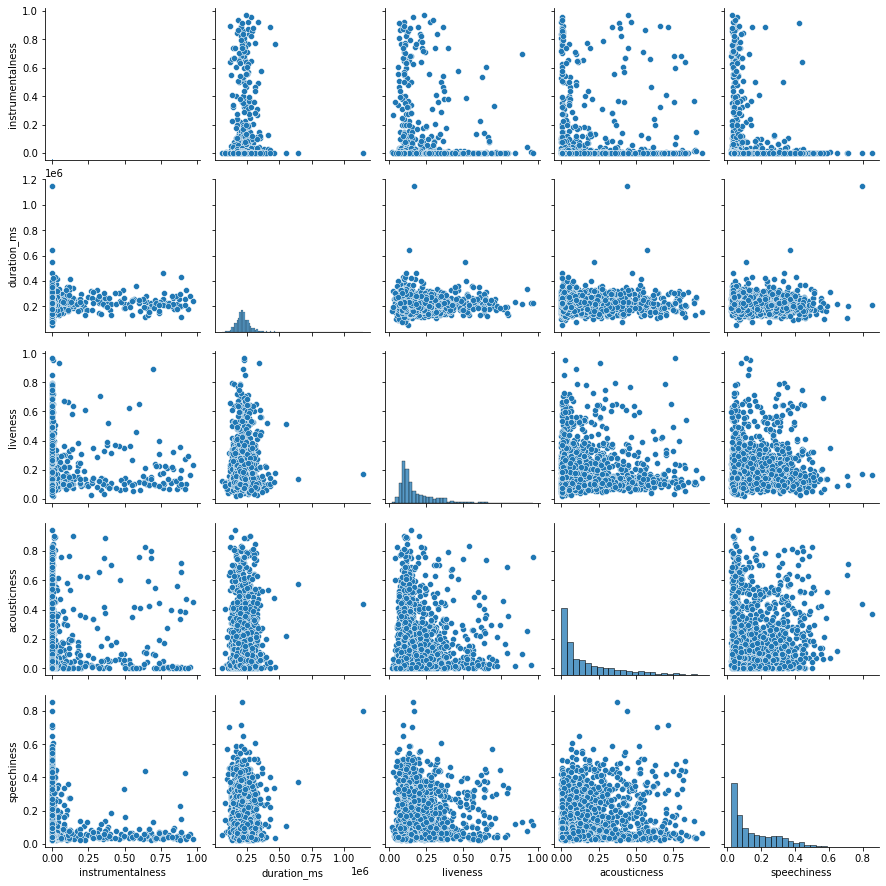

In [7]:
import seaborn as sns

skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(rawDataDF[skew_data])

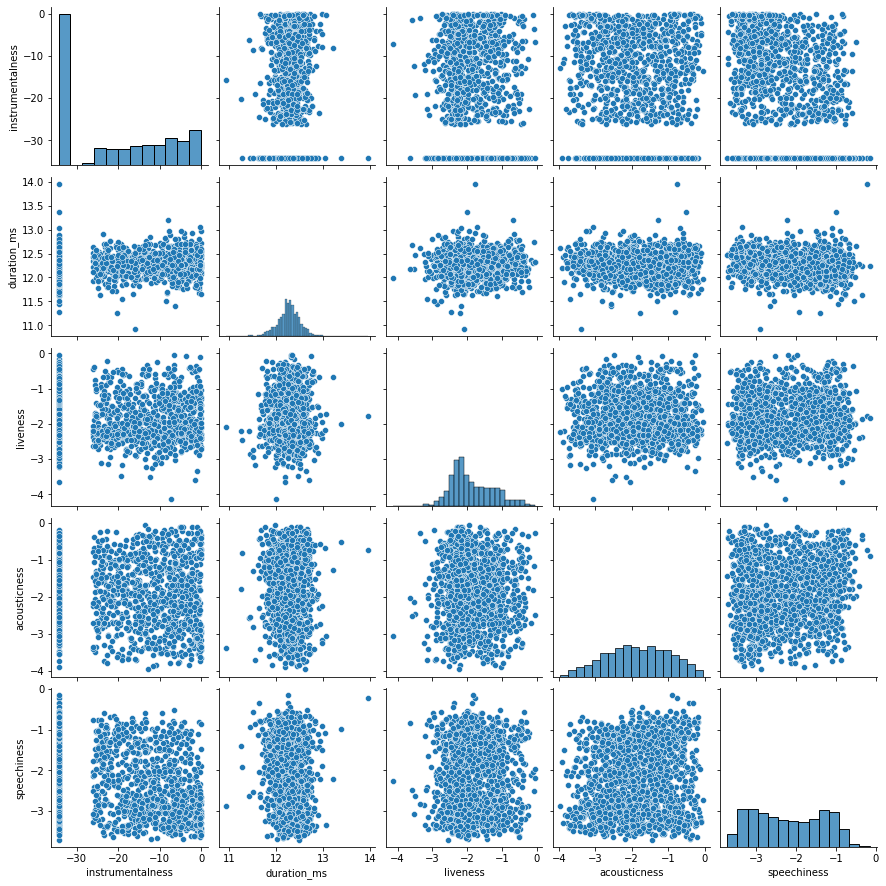

In [8]:
import numpy as np
from scipy import stats

#t_data_df will be the transformed data for addressing skewness
t_data_df = rawDataDF.copy()
#(numeric_data_df.instrumentalness).unique().size
#np.sqrt(numeric_data_df.instrumentalness).hist()
t_data_df['instrumentalness'] = t_data_df['instrumentalness'].replace(0,0.0000001)
t_data_df['instrumentalness'] = stats.boxcox(t_data_df['instrumentalness'])[0]
t_data_df['duration_ms'] = np.log(t_data_df['duration_ms'])
t_data_df['liveness'] = np.log(t_data_df['liveness'])
t_data_df['acousticness'] = stats.boxcox(t_data_df['acousticness'])[0]
t_data_df['speechiness'] = np.log(t_data_df['speechiness'])

import seaborn as sns

skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(t_data_df[skew_data])

## scale features
use MinMaxScaler to scale continous features

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']] = sc.fit_transform(t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])
# scaledFeatures_df = pd.DataFrame(scaledFeatures, index=t_data_df.index, columns=t_data_df.columns)
# scaledFeatures_df
t_data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
3Uw2se3aQU1UFrpRBvBnB4,0.594168,0.605650,4,0.672510,0,0.091628,0.947870,0.931296,0.523681,0.468219,0.533462,0.495397,4
0W6I02J9xcqK8MtSeosEXb,0.917375,0.616949,8,0.728501,0,0.532266,0.755123,0.522799,0.419583,0.803860,0.226766,0.300955,4
6FvSS3Goz7OC8oCC2eWqe8,0.648846,0.813559,0,0.674164,1,0.147294,0.394649,0.000000,0.674234,0.880428,0.233751,0.367539,4
39LLxExYz6ewLAcYrzQQyP,0.653706,0.875706,6,0.905736,0,0.316854,0.475785,0.000000,0.631303,0.930774,0.296003,0.429143,4
6OGogr19zPTM4BALXuMQpF,0.718104,0.712994,8,0.729399,1,0.192581,0.294073,0.491543,0.449335,0.515419,0.408501,0.454708,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.591738,0.418079,4,0.618739,1,0.557165,0.641336,0.000000,0.899219,0.614013,0.151644,0.389329,4
3Z2sglqDj1rDRMF5x0Sz2R,0.383961,0.397740,6,0.707475,0,0.734865,0.620236,0.000000,0.440233,0.617160,0.689783,0.475107,4
14Rcq31SafFBHNEwXrtR2B,0.752126,0.343503,6,0.661926,0,0.382789,0.217393,0.506306,0.368148,0.273128,0.277174,0.466046,4


# K-Prototypes

"The first clustering method we will try is called K-Prototypes. This algorithm is essentially a cross between the K-means algorithm and the K-modes algorithm."

https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086

In [10]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=7, init='Cao')
kproto = kproto.fit(t_data_df,categorical=[2,4,12])
# clusters = kproto.fit_predict(t_data_df, categorical=[2,4,12])

t_data_df['kproto'] = kproto.predict(t_data_df,categorical=[2,4,12])
t_data_df.groupby(['kproto']).size()

kproto
0    190
1    321
2    215
3    206
4    268
5    213
6    166
dtype: int64

In [11]:
t_data_df
#cat vs quant for liz

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kproto
id,,,,,,,,,,,,,,
3Uw2se3aQU1UFrpRBvBnB4,0.594168,0.605650,4,0.672510,0,0.091628,0.947870,0.931296,0.523681,0.468219,0.533462,0.495397,4,3
0W6I02J9xcqK8MtSeosEXb,0.917375,0.616949,8,0.728501,0,0.532266,0.755123,0.522799,0.419583,0.803860,0.226766,0.300955,4,3
6FvSS3Goz7OC8oCC2eWqe8,0.648846,0.813559,0,0.674164,1,0.147294,0.394649,0.000000,0.674234,0.880428,0.233751,0.367539,4,2
39LLxExYz6ewLAcYrzQQyP,0.653706,0.875706,6,0.905736,0,0.316854,0.475785,0.000000,0.631303,0.930774,0.296003,0.429143,4,1
6OGogr19zPTM4BALXuMQpF,0.718104,0.712994,8,0.729399,1,0.192581,0.294073,0.491543,0.449335,0.515419,0.408501,0.454708,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.591738,0.418079,4,0.618739,1,0.557165,0.641336,0.000000,0.899219,0.614013,0.151644,0.389329,4,4
3Z2sglqDj1rDRMF5x0Sz2R,0.383961,0.397740,6,0.707475,0,0.734865,0.620236,0.000000,0.440233,0.617160,0.689783,0.475107,4,1
14Rcq31SafFBHNEwXrtR2B,0.752126,0.343503,6,0.661926,0,0.382789,0.217393,0.506306,0.368148,0.273128,0.277174,0.466046,4,0


In [12]:
# labels = pd.DataFrame(clusters)
# labeledSongs = pd.concat((rawDataDF,labels),axis=1)
# labeledSongs = labeledSongs.rename({0:'labels'},axis=1)

In [14]:
list(enumerate(t_data_df))

[(0, 'danceability'),
 (1, 'energy'),
 (2, 'key'),
 (3, 'loudness'),
 (4, 'mode'),
 (5, 'speechiness'),
 (6, 'acousticness'),
 (7, 'instrumentalness'),
 (8, 'liveness'),
 (9, 'valence'),
 (10, 'tempo'),
 (11, 'duration_ms'),
 (12, 'time_signature'),
 (13, 'kproto')]

danceability
energy
loudness
speechiness
acousticness
valence


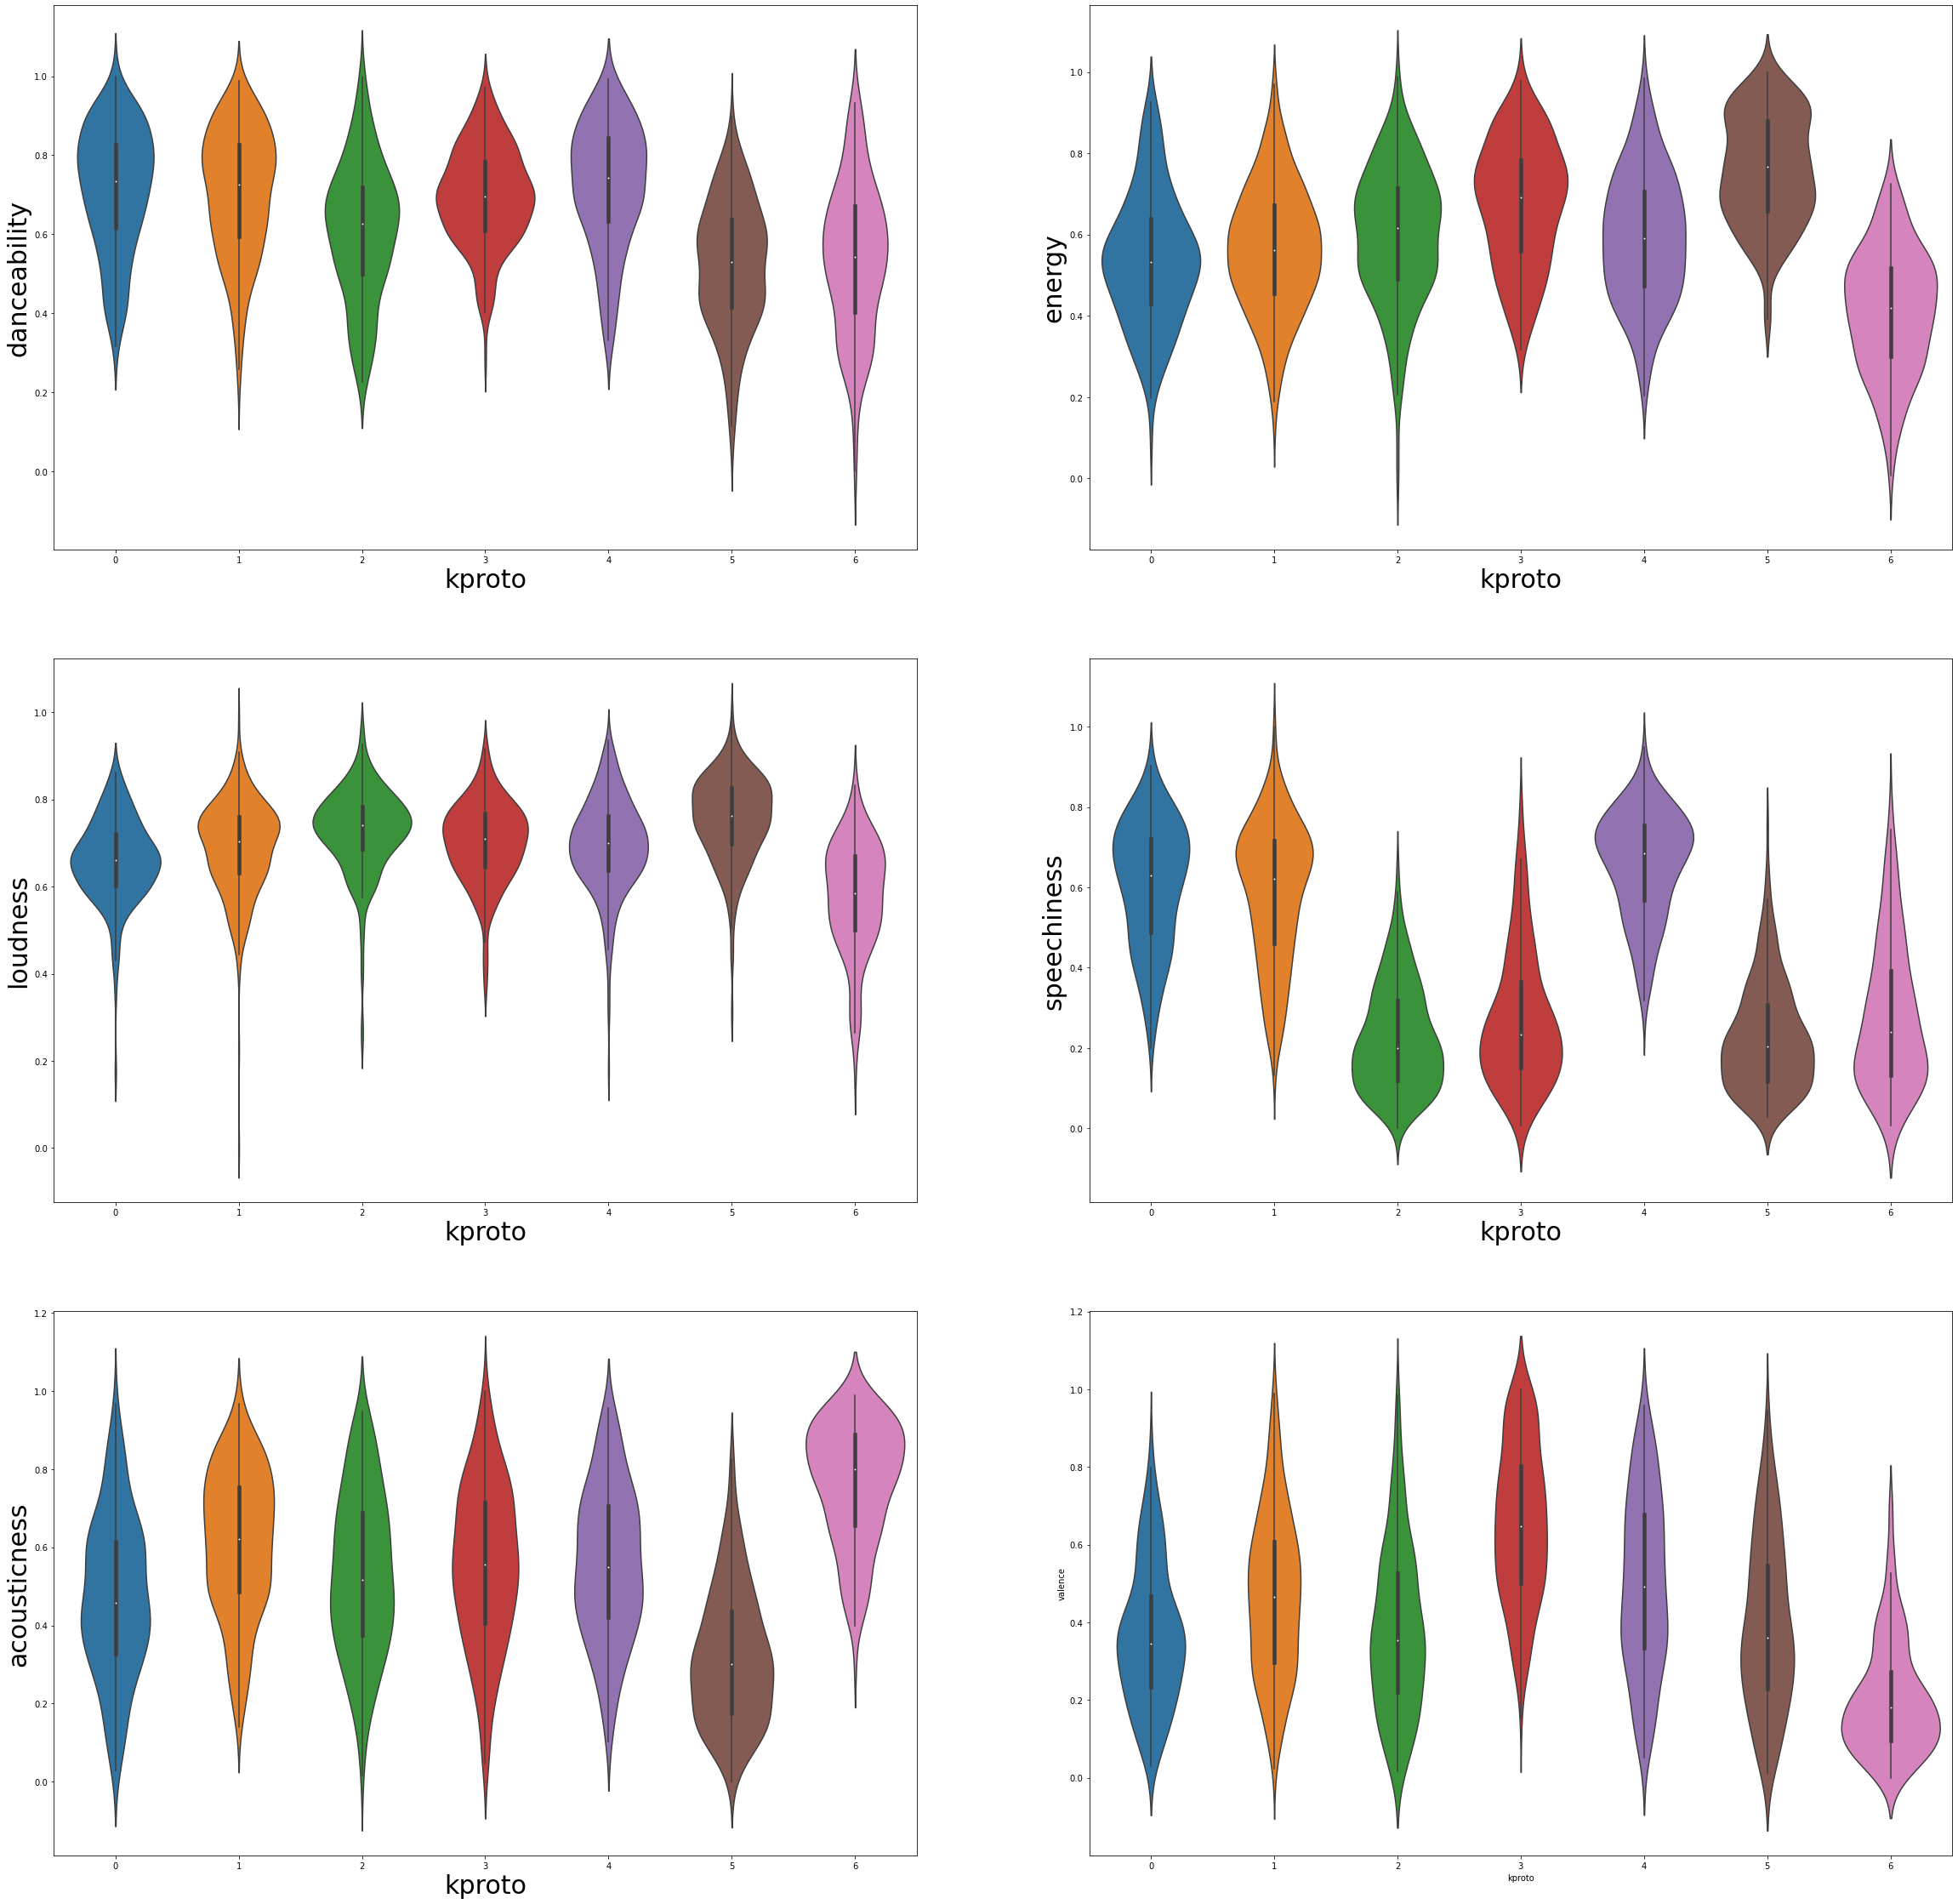

In [17]:
#vibe plots
#cant get last plot to update label size
valueData = ['danceability','energy','loudness','speechiness','acousticness','valence']
valueDataDF = t_data_df[valueData]

import matplotlib.pyplot as plt

#sample = labeledSongs.sample(frac = .9)

plt.figure(figsize=(40,40))

x_size,y_size = 30,30
plt.rcParams.update({'font.size':10 })

#plt.xticks(fontsize= 200)
#enumerate will iterate through a dataframes column names
for i in list((enumerate(valueDataDF))):
    axes = plt.gca()
    axes.xaxis.label.set_size(x_size)
    axes.yaxis.label.set_size(y_size)
    plt.subplot(3,2,(i[0]+1))
    print(i[0+1])
    sns.violinplot(y=i[1], x='kproto', data = t_data_df)


In [19]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
username= 'john3baskerville'
token = util.prompt_for_user_token(username,
                           'user-library-read',
                           client_id='97537d196d1345ecb17c19537d54174a',
                           client_secret='003cf70c6be14a9e991e75f52930c5e3',
                           redirect_uri='http://localhost:8080')

sp = spotipy.Spotify(auth=token)

minPlaylist = t_data_df[t_data_df['kproto'] == 1].index
tracks = sp.tracks(minPlaylist[:50])

for value in tracks['tracks']:
    print(value['name'],"-", value['artists'][0]['name'])


username= 'john3baskerville'
token = util.prompt_for_user_token(username,
                           'user-library-read',
                           client_id='97537d196d1345ecb17c19537d54174a',
                           client_secret='003cf70c6be14a9e991e75f52930c5e3',
                           redirect_uri='http://localhost:8080')

sp = spotipy.Spotify(auth=token)


tracks = sp.tracks(minPlaylist[:25])

for value in tracks['tracks']:
    print(value['name'])
    for artist in value['artists']:
        print(" " + artist['name'])

Levitating - Dua Lipa
XXL - DaBaby
GANG GANG (with Lil Wayne) - Polo G
Brave (feat. Dakk & EVAN GIIA) - MEMBA
Key to the Streets (Remix) - YFN Lucci
RAPSTAR - Polo G
THat Part - ScHoolboy Q
Overtime - ScHoolboy Q
Mystery Lady (feat. Don Toliver) - Masego
Run It Up (feat. Offset & Moneybagg Yo) - Lil Tjay
Solid (feat. Drake) - Young Stoner Life
Quicksand - Morray
Company (feat. Future) - 24kGoldn
Lets Ride - Ground Up
BUZZCUT (feat. Danny Brown) - BROCKHAMPTON
MONTERO (Call Me By Your Name) - Lil Nas X
Lost In America - Lo Village
Point - XanMan
Whoopty - CJ
Hooped - Nafets
Jet Fuel - Mac Miller
Christopher Walking - Pop Smoke
Hello (feat. A Boogie Wit da Hoodie) - Pop Smoke
She Knows This - Kid Cudi
SQUARE UP (feat. Juicy J) - IDK
WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil Wayne) - Remix - Tory Lanez
HOLIDAY - Lil Nas X
TKN (feat. Travis Scott) - ROSALÍA
FRANCHISE (feat. Young Thug & M.I.A.) - Travis Scott
Moonwalking in Calabasas (feat. Blueface) - Remix - DDG
2012 - Joey Purp
B.Q.E